In [1]:
import pandas as pd 
import numpy as np 
import seaborn as sn 
import os 
import geopandas
import matplotlib.pyplot as plt
from math import radians, sin, cos, sqrt, atan2

In [2]:
datafiles = ["USDA-AMS-Data-and-Metrics\\Food Access\\food_access1.csv",
            "USDA-AMS-Data-and-Metrics\\Food Access\\food_access2.csv",
            "USDA-AMS-Data-and-Metrics\\Business Development and Infrastructure\\business_development_infrastructure.csv",
            "USDA-AMS-Data-and-Metrics\\Grants\\grants.csv",
            "USDA-AMS-Data-and-Metrics\\Indicators of Community Wealth\\community_wealth.csv",
            "USDA-AMS-Data-and-Metrics\\Local Food Sales\\local_food_sales.csv"]

In [3]:
variables = ["pct_laccess_hhnv", 
             "food_banks", 
             "food_desert_1and10", 
             "retail_density_index", 
             "food_insecurity_rate", 
             "SNAP_percent_white_alone", 
             "SNAP_percent_black_alone", 
             "SNAP_percent_indian_alone", 
             "SNAP_percent_asian_alone", 
             "SNAP_percent_native_hawaiian_alone", 
             "SNAP_percent_other_race_alone", 
             "SNAP_percent_two_or_more_races", 
             "SNAP_percent_hispanic_any_race", 
             "SNAP_percent_white_alone_not_hispanic",
             "pct_laccess_white", 
             "pct_laccess_black", 
             "pct_laccess_hisp", 
             "pct_laccess_nhasian", 
             "pct_laccess_nhna", 
             "pct_laccess_nhpi", 
             "pct_laccess_multir", 
             "below_poverty_level_white_alone", 
             "below_poverty_level_black_or_african_american_alone", 
             "below_poverty_level_american_indian_and_alaska_native_alone",
             "below_poverty_level_asian_alone", 
             "below_poverty_level_native_hawaiian_and_other_pacific_islander_alone", 
             "below_poverty_level_some_other_race_alone", 
             "below_poverty_level_two_or_more_races", 
             "below_poverty_level_hispanic_or_latino_origin__of_any_race_", 
             "below_poverty_level_white_alone__not_hispanic_or_latino",
             "below_poverty_level_18_to_34_years", 
             "below_poverty_level_60_years_and_over",
             "below_poverty_level_percent_civilian_labor_force_16_years_and_over",
             "ed_attain",
             "ffrpth",
             "convspth",
             "annual_avg_estabs_count_NAICS 44511 Supermarkets and other grocery stores"]

In [4]:
full_df = pd.read_csv(datafiles[0]).dropna(subset=['county_name'])
full_df['fips'] = full_df['fips'].astype(str).str.zfill(5)
full_df = full_df.pivot(index=['fips', 'year'], columns='variable_name', values='value')
columns = [x for x in full_df.columns if x in variables]
full_df = full_df[columns]

for file in datafiles[1:]:
    #read in datasheet and drop anything that is not a county
    data = pd.read_csv(file).dropna(subset=['county_name'])
    #fix dropping of leading zero
    data['fips'] = data['fips'].astype(str).str.zfill(5)
    #create pivoted df
    pivoted_df = data.pivot(index=['fips', 'year'], columns='variable_name', values='value')
    #merge only needed vars with the full dataframe
    columns = [x for x in pivoted_df.columns if x in variables]
    full_df = full_df.combine_first(pivoted_df[columns])
full_df

C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])
C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2474579696.py:16: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  full_df = full_df.combine_first(pivoted_df[columns])


variable_name  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips  year                                                          
01001 2015                          NaN                       NaN   
      2016                          NaN                       NaN   
      2017                          0.0                     0.412   
      2018                          0.0                     0.441   
      2019                          0.0                     0.461   
...                                 ...                       ...   
72153 2022                          NaN                       NaN   
74300 2022                          NaN                       NaN   
78010 2022                          NaN                       NaN   
78020 2022                          NaN                       NaN   
78030 2022                          NaN                       NaN   

variable_name  SNAP_percent_hispanic_any_race  SNAP_percent_indian_alone  \
fips  year                                                                 
01001 2015                                NaN                        NaN   
      2016                                NaN                        NaN   
      2017                              0.014                      0.006   
      2018                              0.017                      0.007   
      2019                              0.007                      0.000   
...                                       ...                        ...   
72153 2022                                NaN                        NaN   
74300 2022                                NaN                        NaN   
78010 2022                                NaN                        NaN   
78020 2022                                NaN                        NaN   
78030 2022                                NaN                        NaN   

variable_name  SNAP_percent_native_hawaiian_alone  \
fips  year                                          
01001 2015                                    NaN   
      2016                                    NaN   
      2017                                    0.0   
      2018                                    0.0   
      2019                                    0.0   
...                                           ...   
72153 2022                                    NaN   
74300 2022                                    NaN   
78010 2022                                    NaN   
78020 2022                                    NaN   
78030 2022                                    NaN   

variable_name  SNAP_percent_other_race_alone  SNAP_percent_two_or_more_races  \
fips  year                                                                     
01001 2015                               NaN                             NaN   
      2016                               NaN                             NaN   
      2017                               0.0                           0.009   
      2018                               0.0                           0.018   
      2019                               0.0                           0.024   
...                                      ...                             ...   
72153 2022                               NaN                             NaN   
74300 2022                               NaN                             NaN   
78010 2022                               NaN                             NaN   
78020 2022                               NaN                             NaN   
78030 2022                               NaN                             NaN   

variable_name  SNAP_percent_white_alone  \
fips  year                                
01001 2015                          NaN   
      2016                          NaN   
      2017                        0.573   
      2018                        0.534   
      2019                        0.515   
...                                 ...   
72153 2022                          Na

In [5]:
states = ['02',
            '01',
            '04',
            '05',
            '06',
            '08',
            '09',
            '10',
            '12',
            '13',
            '15',
            '16',
            '17',
            '18',
            '19',
            '20',
            '21',
            '23',
            '24',
            '25',
            '26',
            '27',
            '28',
            '29',
            '30',
            '31',
            '32',
            '33',
            '34',
            '35',
            '36',
            '37',
            '38',
            '39',
            '40',
            '41',
            '42',
            '44',
            '45',
            '46',
            '47',
            '48',
            '49',
            '50',
            '51',
            '53',
            '54',
            '55',
            '56',
            '22',
            '11']

In [6]:
full_df['fips_prefix'] = full_df.index.get_level_values('fips').str[:2]
df_filtered = full_df[full_df['fips_prefix'].isin(states)]

In [7]:
df_filtered = df_filtered.groupby(level='fips').ffill()
df_filtered = df_filtered.loc[df_filtered.index.get_level_values('year') == 2022]
df_filtered

,variable_name,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,below_poverty_level_18_to_34_years,...,pct_laccess_black,pct_laccess_hhnv,pct_laccess_hisp,pct_laccess_multir,pct_laccess_nhasian,pct_laccess_nhna,pct_laccess_nhpi,pct_laccess_white,retail_density_index,fips_prefix
fips,year,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,1755.0,...,0.077266,0.033513,0.008633,0.008848,0.001590,0.001121,0.000162,0.231636,0.128134,01
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,4647.0,...,0.019428,0.019051,0.007560,0.006187,0.001168,0.000997,0.000081,0.139814,0.171615,01
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,1514.0,...,0.098814,0.043294,0.018552,0.016840,0.000623,0.001455,0.000294,0.103029,0.198475,01
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,829.0,...,0.018289,0.028214,0.000375,0.000230,0.000087,0.000110,0.000000,0.023588,0.182554,01
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,1362.0,...,0.001672,0.033364,0.008679,0.003540,0.000147,0.000505,0.000018,0.059091,0.112796,01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,1281.0,...,0.004252,0.021828,0.060753,0.036648,0.002619,0.004329,0.000633,0.383760,0.124511,56
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,726.0,...,0.000427,0.005402,0.034572,0.021623,0.002512,0.001525,0.000398,0.265259,0.322541,56
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,449.0,...,0.000710,0.027599,0.025363,0.016589,0.000655,0.001910,0.000312,0.201721,0.170996,56


In [8]:
data = pd.read_csv("USDA-AMS-Data-and-Metrics\\Point level data\\point_data.csv")
data['fips'] = data['fips'].astype(str).str.zfill(5)
data

,fips,state_name,county_name,lat,long,org_type,variable_name
0,06057,California,Nevada County,39.320260,-120.150670,Food Hub,location_food_hub
1,35045,New Mexico,San Juan County,36.773792,-108.167380,Food Hub,location_food_hub
2,37099,North Carolina,Jackson County,35.322406,-83.157802,Food Hub,location_food_hub
3,19191,Iowa,Winneshiek County,43.298101,-91.787872,Food Hub,location_food_hub
4,06075,California,San Francisco County,37.750507,-122.389110,Food Hub,location_food_hub
...,...,...,...,...,...,...,...
12989,32003,Nevada,Clark County,36.142355,-115.206409,Colleges and universities,location_colleges_universities
12990,32003,Nevada,Clark County,36.117236,-115.158173,Colleges and universities,location_colleges_universities
12991,34007,New Jersey,Camden County,39.939428,-75.015417,Colleges and universities,location_colleges_universities
12992,06029,California,Kern County,35.339951,-119.035082,Colleges and universities,location_colleges_universities


In [9]:
filename = "countiesWithStatesAndPopulation.shp"
map_data = geopandas.read_file(filename = filename)
map_data["FIPS"] = map_data["STATEFP"].astype(str) + map_data["COUNTYFP"].astype(str)
map_data['FIPS'] = map_data['FIPS'].astype(str).str.zfill(5)
map_data = map_data.set_index("FIPS")
map_data = map_data[["NAME", "State", "geometry"]]
map_data

,NAME,State,geometry
FIPS,,,
21007,Ballard,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053..."
21017,Bourbon,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283..."
21031,Butler,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074..."
21065,Estill,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646..."
21069,Fleming,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450..."
...,...,...,...
31073,Gosper,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4..."
39075,Holmes,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667..."
48171,Gillespie,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499..."


In [10]:
map_data["Centroid"] = map_data["geometry"].centroid
map_data["Rep Point"] = map_data["geometry"].representative_point()
map_data

C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2108220289.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  map_data["Centroid"] = map_data["geometry"].centroid


,NAME,State,geometry,Centroid,Rep Point
FIPS,,,,,
21007,Ballard,Kentucky,"POLYGON ((-89.18137 37.04630, -89.17938 37.053...",POINT (-88.99926 37.05848),POINT (-89.01836 37.07120)
21017,Bourbon,Kentucky,"POLYGON ((-84.44266 38.28324, -84.44114 38.283...",POINT (-84.21715 38.20673),POINT (-84.22401 38.21958)
21031,Butler,Kentucky,"POLYGON ((-86.94486 37.07341, -86.94346 37.074...",POINT (-86.68162 37.20728),POINT (-86.65789 37.19764)
21065,Estill,Kentucky,"POLYGON ((-84.12662 37.64540, -84.12483 37.646...",POINT (-83.96431 37.69244),POINT (-83.93100 37.69800)
21069,Fleming,Kentucky,"POLYGON ((-83.98428 38.44549, -83.98246 38.450...",POINT (-83.69666 38.37012),POINT (-83.67828 38.34823)
...,...,...,...,...,...
31073,Gosper,Nebraska,"POLYGON ((-100.09510 40.43866, -100.08937 40.4...",POINT (-99.83070 40.51482),POINT (-99.81270 40.53977)
39075,Holmes,Ohio,"POLYGON ((-82.22066 40.66758, -82.19327 40.667...",POINT (-81.92934 40.56121),POINT (-81.92247 40.56120)
48171,Gillespie,Texas,"POLYGON ((-99.30400 30.49983, -99.28234 30.499...",POINT (-98.94655 30.31804),POINT (-98.94655 30.39217)


(-200.0, -50.0)

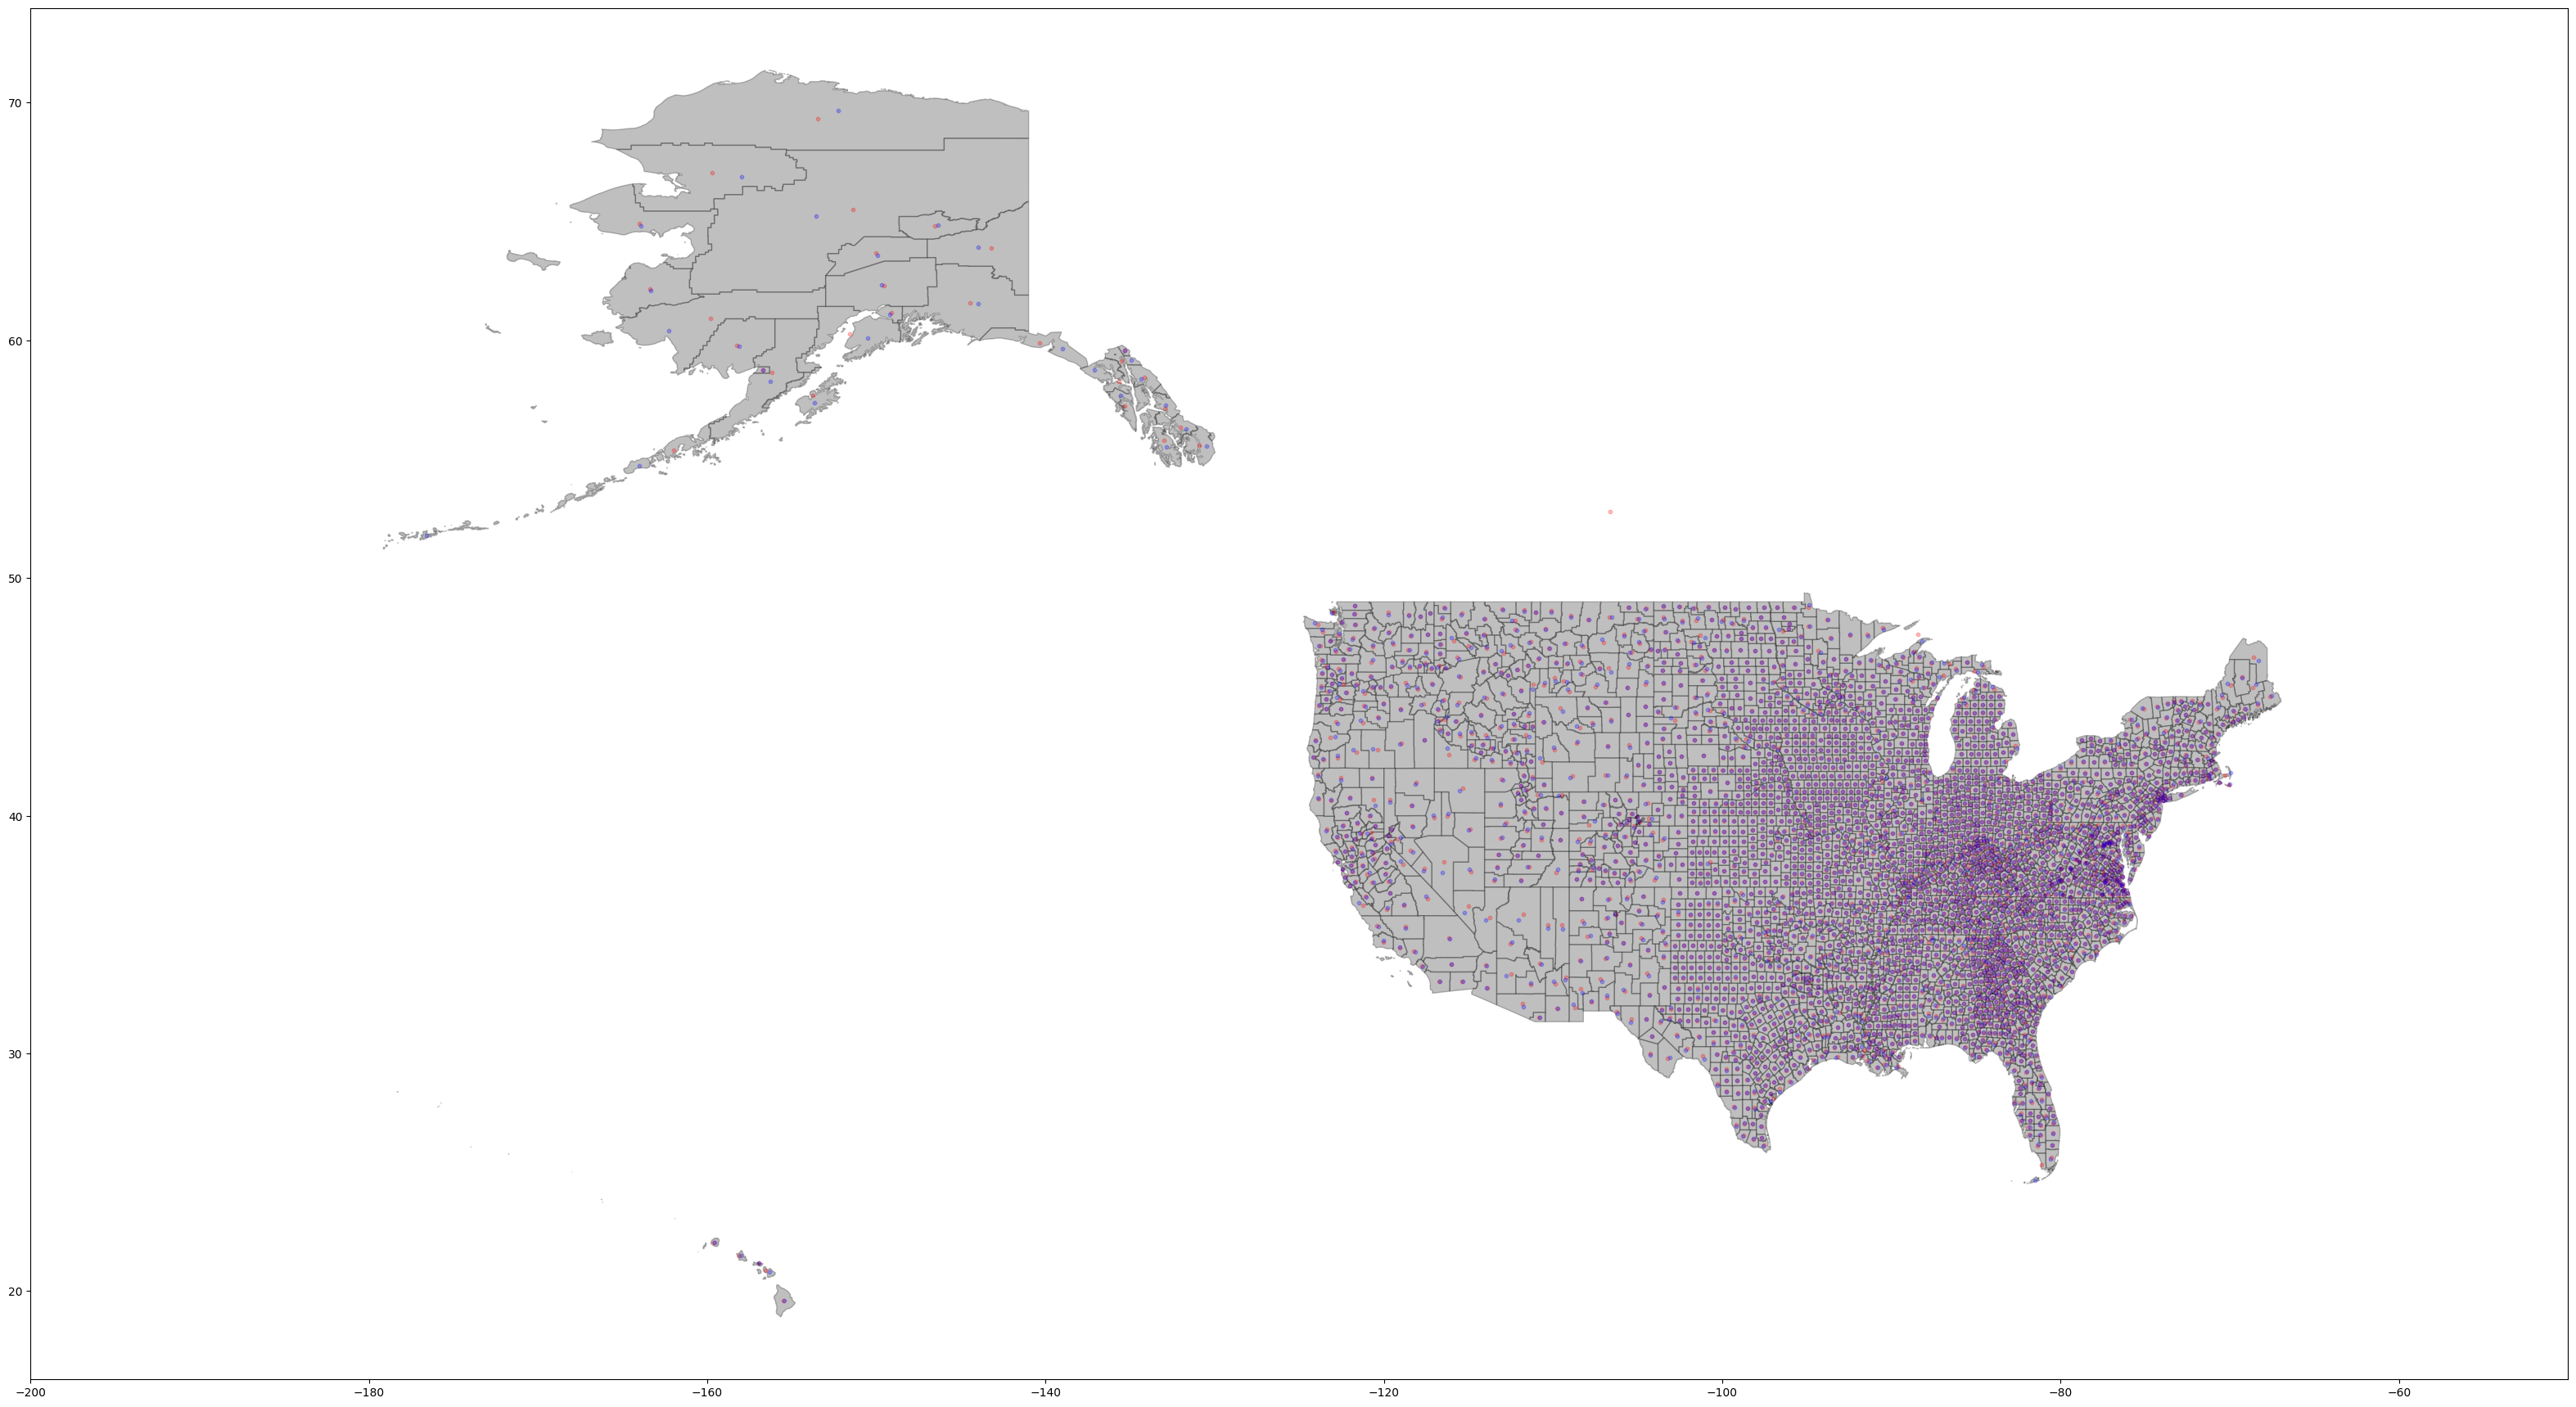

In [11]:
fig, ax = plt.subplots(figsize=(40,80))
map_data["geometry"].plot(color="k", alpha=0.25, ax=ax, edgecolor="k")
map_data["Centroid"].plot(marker='o', color='red', markersize=10, alpha=.25, ax=ax)
map_data["Rep Point"].plot(marker='o', color='blue', markersize=10, alpha=.25, ax=ax)
x_min = -200
x_max = -50
plt.xlim(x_min, x_max)

In [12]:
df_filtered.reset_index(level='year', inplace=True)

In [13]:
df_filtered[["geometry","Rep Point"]] = map_data[["geometry", "Rep Point"]]

In [14]:
df_filtered.to_csv("test.csv")

In [15]:
print(df_filtered[df_filtered.isna().any(axis=1)])#.to_csv("missing.csv")

variable_name  year  SNAP_percent_asian_alone  SNAP_percent_black_alone  \
fips                                                                      
02013          2022                     0.000                     0.000   
02016          2022                     0.379                     0.000   
02020          2022                     0.081                     0.104   
02050          2022                     0.000                     0.021   
02060          2022                     0.000                     0.000   
...             ...                       ...                       ...   
51790          2022                     0.000                     0.103   
51820          2022                     0.000                     0.210   
51830          2022                     0.010                     0.654   
51840          2022                     0.000                     0.186   
55091          2022                     0.000                     0.000   

variable_name  SNAP_perc

In [16]:
df_filtered = df_filtered.dropna(how="any", axis = 0)

In [20]:
def calculate_distance(lat1, lon1, lat2, lon2):
    # Convert degrees to radians
    lat1_rad = np.radians(lat1)
    lon1_rad = np.radians(lon1)
    lat2_rad = np.radians(lat2)
    lon2_rad = np.radians(lon2)

    # Radius of the Earth in kilometers
    earth_radius = 6371

    # Calculate the differences between the latitudes and longitudes
    delta_lat = lat2_rad - lat1_rad
    delta_lon = lon2_rad - lon1_rad

    # Apply the Haversine formula
    a = np.sin(delta_lat / 2) ** 2 + np.cos(lat1_rad) * np.cos(lat2_rad) * np.sin(delta_lon / 2) ** 2
    c = 2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a))
    distance = earth_radius * c

    return distance

In [21]:
# Initialize the counts as zero
df_filtered["college_region"] = 0
df_filtered["csa_region"] = 0
df_filtered["fm_region"] = 0
df_filtered["fh_region"] = 0
df_filtered["mp_region"] = 0

# Filter the data DataFrame by org_type once
colleges = data[data["org_type"] == "Colleges and universities"]
csas = data[data["org_type"] == "Community Supported Agriculture (CSA)"]
farmers_markets = data[data["org_type"] == "Farmers Market"]
food_hubs = data[data["org_type"] == "Food Hub"]
meat_processors = data[data["org_type"] == "Meat processor"]

for i, row in df_filtered.iterrows():
    point1x = row["Rep Point"].x
    point1y = row["Rep Point"].y

    # Calculate distances for each org_type and count within the given distance threshold
    college_count = ((calculate_distance(point1y, point1x, colleges["lat"], colleges["long"]) <= 563.2704).sum())
    csa_count = ((calculate_distance(point1y, point1x, csas["lat"], csas["long"]) <= 563.2704).sum())
    fm_count = ((calculate_distance(point1y, point1x, farmers_markets["lat"], farmers_markets["long"]) <= 563.2704).sum())
    fh_count = ((calculate_distance(point1y, point1x, food_hubs["lat"], food_hubs["long"]) <= 563.2704).sum())
    mp_count = ((calculate_distance(point1y, point1x, meat_processors["lat"], meat_processors["long"]) <= 563.2704).sum())

    # Assign the counts to the respective columns
    df_filtered.at[i, "college_region"] = college_count
    df_filtered.at[i, "csa_region"] = csa_count
    df_filtered.at[i, "fm_region"] = fm_count
    df_filtered.at[i, "fh_region"] = fh_count
    df_filtered.at[i, "mp_region"] = mp_count

C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2955415022.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["college_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2955415022.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered["csa_region"] = 0
C:\Users\hthog\AppData\Local\Temp\ipykernel_24420\2955415022.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See th

In [22]:
df_filtered

variable_name,year,SNAP_percent_asian_alone,SNAP_percent_black_alone,SNAP_percent_hispanic_any_race,SNAP_percent_indian_alone,SNAP_percent_native_hawaiian_alone,SNAP_percent_other_race_alone,SNAP_percent_two_or_more_races,SNAP_percent_white_alone,SNAP_percent_white_alone_not_hispanic,...,pct_laccess_white,retail_density_index,fips_prefix,geometry,Rep Point,college_region,csa_region,fm_region,fh_region,mp_region
fips,,,,,,,,,,,,,,,,,,,,,
01001,2022,0.000,0.440,0.006,0.000,0.0,0.000,0.011,0.549,0.542,...,0.231636,0.128134,01,"POLYGON ((-86.92120 32.65754, -86.92035 32.658...",POINT (-86.65122 32.50796),672,2,52,1,614
01003,2022,0.001,0.218,0.044,0.035,0.0,0.021,0.010,0.715,0.699,...,0.139814,0.171615,01,"POLYGON ((-88.02858 30.22676, -88.02399 30.230...",POINT (-87.78275 30.76986),463,1,31,0,436
01005,2022,0.000,0.656,0.055,0.000,0.0,0.043,0.019,0.282,0.270,...,0.103029,0.198475,01,"POLYGON ((-85.74803 31.61918, -85.74544 31.618...",POINT (-85.39292 31.88289),738,3,51,1,641
01007,2022,0.000,0.500,0.007,0.000,0.0,0.000,0.000,0.500,0.493,...,0.023588,0.182554,01,"POLYGON ((-87.42194 33.00338, -87.31854 33.006...",POINT (-87.09673 33.03733),678,2,58,1,631
01009,2022,0.000,0.009,0.122,0.000,0.0,0.007,0.043,0.941,0.826,...,0.059091,0.112796,01,"POLYGON ((-86.96336 33.85822, -86.95967 33.857...",POINT (-86.53370 34.01274),766,5,74,2,692
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56037,2022,0.015,0.038,0.097,0.060,0.0,0.018,0.090,0.779,0.755,...,0.383760,0.124511,56,"POLYGON ((-110.05438 42.01103, -110.05436 42.0...",POINT (-108.98878 41.61610),197,4,20,4,234
56039,2022,0.000,0.000,0.000,0.000,0.0,0.000,0.000,1.000,1.000,...,0.265259,0.322541,56,"POLYGON ((-111.05361 44.66627, -110.75076 44.6...",POINT (-110.55003 43.94168),130,5,12,2,145
56041,2022,0.000,0.000,0.056,0.040,0.0,0.009,0.020,0.931,0.884,...,0.201721,0.170996,56,"POLYGON ((-111.04662 41.15604, -111.04659 41.2...",POINT (-110.54774 41.32322),203,5,19,4,228


In [23]:
df_filtered.to_csv("50 States Data with Points.csv")